### Importing needed packages

In [1]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading the data from CSV file 

In [2]:
df = pd.read_csv("cars_clus.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [3]:
df.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
5,Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.000,3.561,18.500,22.000,2.933,0.0
6,Audi,A8,1.380,39.000,0.000,62.000,4.200,310.000,113.000,74.000,198.200,3.902,23.700,21.000,0.322,0.0
7,BMW,323i,19.747,$null$,0.000,26.990,2.500,170.000,107.300,68.400,176.000,3.179,16.600,26.100,2.983,0.0
8,BMW,328i,9.231,28.675,0.000,33.400,2.800,193.000,107.300,68.500,176.000,3.197,16.600,24.000,2.223,0.0
9,BMW,528i,17.527,36.125,0.000,38.900,2.800,193.000,111.400,70.900,188.000,3.472,18.500,24.800,2.864,0.0


In [4]:
df[["resale"]].value_counts

<bound method DataFrame.value_counts of      resale
0    16.360
1    19.875
2    18.225
3    29.725
4    22.255
..      ...
154  $null$
155  $null$
156  $null$
157  $null$
158  $null$

[159 rows x 1 columns]>

## Cleaning the dataset by droping the rows containing NULL values

In [5]:
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [6]:
print(f"shape of dataset before cleaning:\n{df.size}")
# Convert selected columns to numeric types
# If conversion fails (e.g., text instead of numbers), set as NaN (missing value)


df[
    [
        "sales",
        "resale",
        "type",
        "price",
        "engine_s",
        "horsepow",
        "wheelbas",
        "width",
        "length",
        "curb_wgt",
        "fuel_cap",
        "mpg",
        "lnsales",
    ]
] = df[
    [
        "sales",
        "resale",
        "type",
        "price",
        "engine_s",
        "horsepow",
        "wheelbas",
        "width",
        "length",
        "curb_wgt",
        "fuel_cap",
        "mpg",
        "lnsales",
    ]
].apply(
    pd.to_numeric, errors="coerce"
)

# Drop all rows with any missing values (NaNs)
df = df.dropna()

# Reset the index after dropping rows (to make it continuous from 0)
df = df.reset_index(drop=True)
df.head()

shape of dataset before cleaning:
2544


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Select some feature of the dataset to work on 

In [7]:
featured_set = df[
    [
        "engine_s",
        "horsepow",
        "wheelbas",
        "width",
        "length",
        "curb_wgt",
        "fuel_cap",
        "mpg",
    ]
]

featured_set.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


### Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

x = np.array(featured_set)  # Tp return a numpy array
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

### Clustering using scikit-learn

In [9]:
clustering = AgglomerativeClustering(n_clusters=6, linkage="complete")
clustering.fit(x)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [10]:
labels = clustering.labels_
labels

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
df["cluster"] = labels
df.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0.0,3
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0.0,1
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0.0,2
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0.0,2
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0.0,2


C:\Users\SasanMaleknia\AppData\Local\Temp\ipykernel_16496\3350606739.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


Text(0, 0.5, 'mpg')

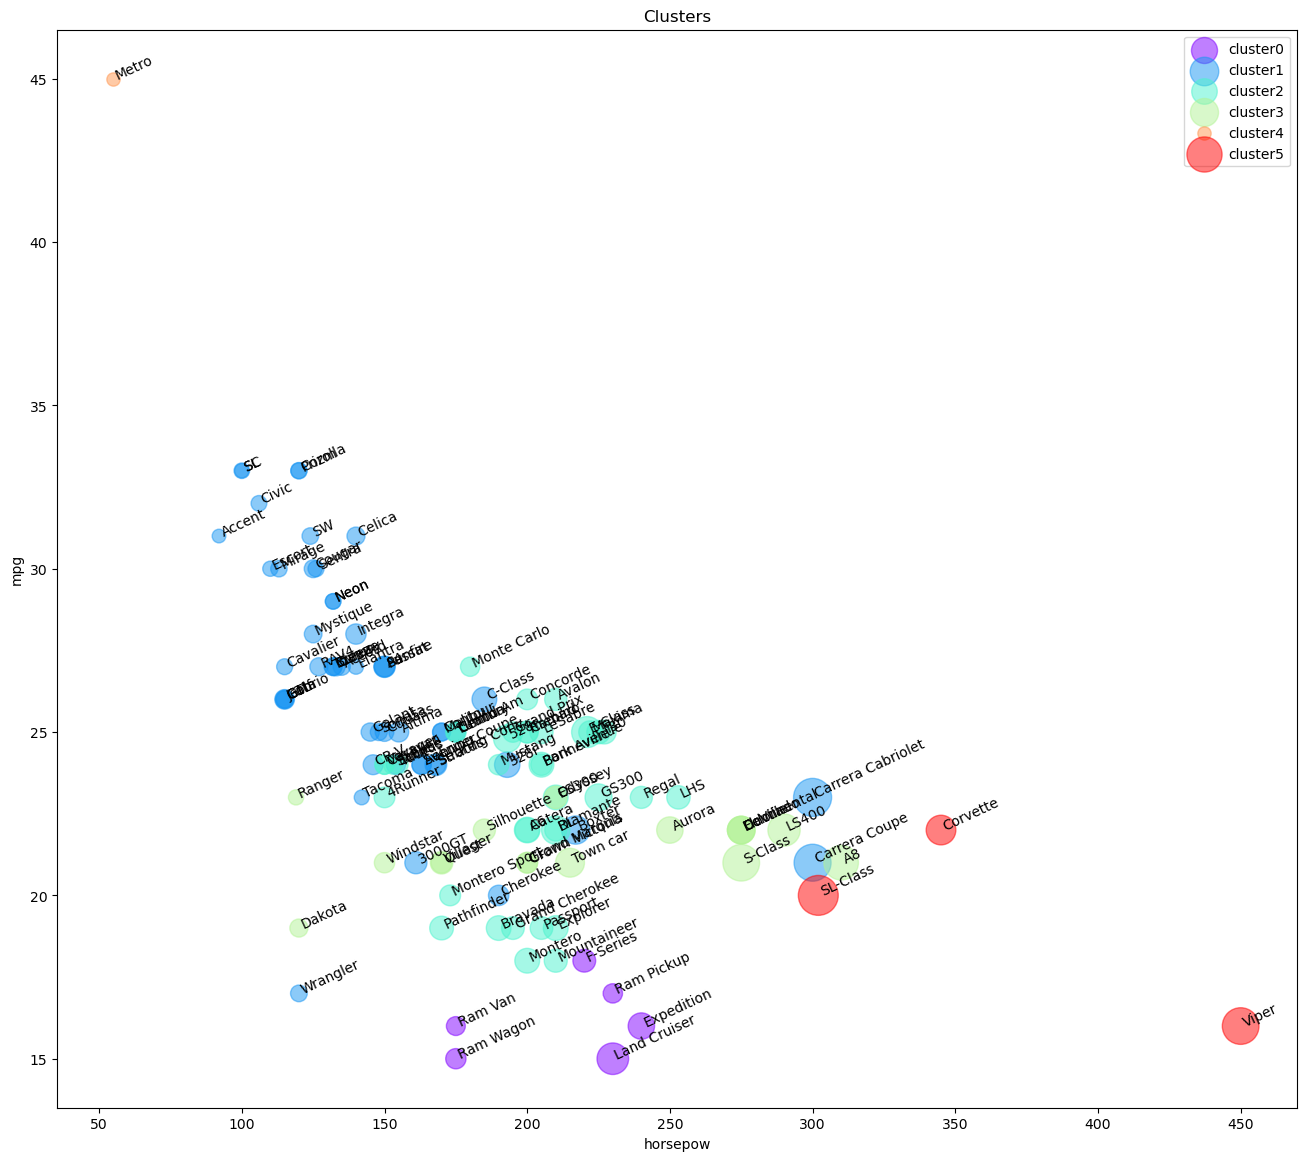

In [12]:
import matplotlib.cm as cm

n_clusters = max(clustering.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
        plt.text(
            subset.horsepow[i], subset.mpg[i], str(subset["model"][i]), rotation=25
        )
    plt.scatter(
        subset.horsepow,
        subset.mpg,
        s=subset.price * 10,
        c=color,
        label="cluster" + str(label),
        alpha=0.5,
    )
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title("Clusters")
plt.xlabel("horsepow")
plt.ylabel("mpg")

In [13]:
df.groupby(["cluster", "type"])["cluster"].count()

cluster  type
0        1.0      6
1        0.0     47
         1.0      5
2        0.0     27
         1.0     11
3        0.0     10
         1.0      7
4        0.0      1
5        0.0      3
Name: cluster, dtype: int64

In [14]:
agg_cars = df.groupby(["cluster", "type"])[
    ["horsepow", "engine_s", "mpg", "price"]
].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster type                                            
0       1.0   211.666667  4.483333  16.166667  29.024667
1       0.0   146.531915  2.246809  27.021277  20.306128
        1.0   145.000000  2.580000  22.200000  17.009200
2       0.0   203.111111  3.303704  24.214815  27.750593
        1.0   182.090909  3.345455  20.181818  26.265364
3       0.0   256.500000  4.410000  21.500000  42.870400
        1.0   160.571429  3.071429  21.428571  21.527714
4       0.0    55.000000  1.000000  45.000000   9.235000
5       0.0   365.666667  6.233333  19.333333  66.010000

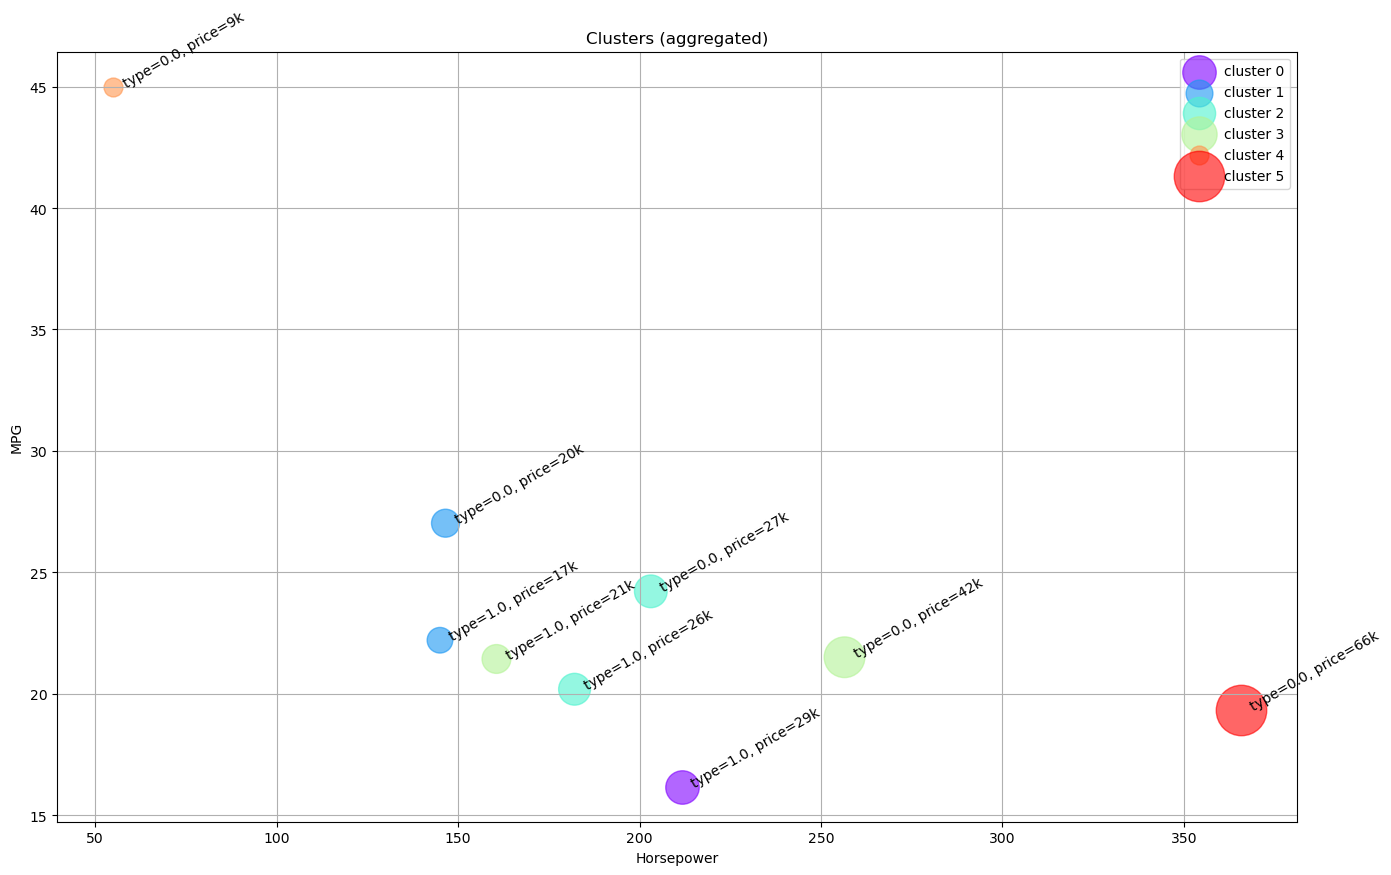

In [15]:
plt.figure(figsize=(16, 10))

# Loop through each cluster
for color, label in zip(colors, cluster_labels):
    # Select all rows with current cluster
    subset = agg_cars.loc[label]

    # Loop through each car type inside the cluster
    for i in subset.index:
        # Add text label near each point
        plt.text(
            subset.loc[i]["horsepow"] + 2,
            subset.loc[i]["mpg"],
            f'type={i}, price={int(subset.loc[i]["price"])}k',
            rotation=30,
        )

    # Plot scatter points
    plt.scatter(
        subset["horsepow"],
        subset["mpg"],
        s=subset["price"] * 20,
        c=[color],
        label=f"cluster {label}",
        alpha=0.6,
    )

plt.legend()
plt.title("Clusters (aggregated)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.grid(True)
plt.show()

### Visulizing the Dendrogram

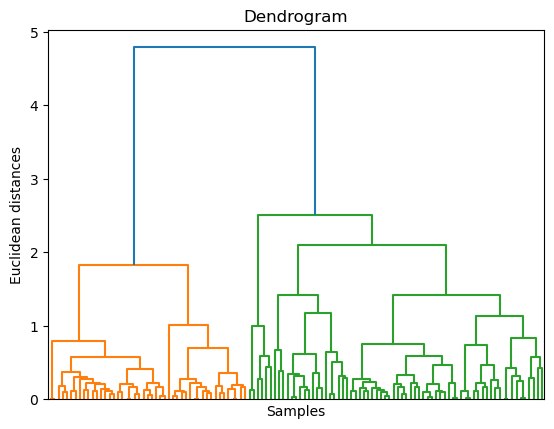

In [16]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Your dendrogram
dendrogram = sch.dendrogram(sch.linkage(x, method="ward"))

plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")

plt.xticks([], [])  # This hides all x-axis text

plt.show()